### Problem 1: Linear Regression

You are a part of an investment firm and your work is to do research about these 759 firms. You are
provided with the dataset containing the sales and other attributes of these 759 firms. Predict the
sales of these firms on the bases of the details given in the dataset so as to help your company in
investing consciously. Also, provide them with 5 attributes that are most important.

Data Dictionary for Firm_level_data:
    
1. sales: Sales (in millions of dollars).
2. capital: Net stock of property, plant, and equipment.
3. patents: Granted patents.
4. randd: R&D stock (in millions of dollars).
5. employment: Employment (in 1000s).
6. sp500: Membership of firms in the S&P 500 index. S&P is a stock market index that measures the
stock performance of 500 large companies listed on stock exchanges in the United States
7. tobinq: Tobin's q (also known as q ratio and Kaldor's v) is the ratio between a physical asset's
market value and its replacement value.
8. value: Stock market value.
9. institutions: Proportion of stock owned by institutions.

### 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [1]:
# Importing required libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read Data:

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\lenovo'

In [6]:
os.chdir('C:\\Users\\lenovo\\Desktop\\desktop_2\\GL-Anish\\GL_DSBA\\Module_5_PredictiveModelling\\Alt_Project')

In [7]:
os.getcwd()

'C:\\Users\\lenovo\\Desktop\\desktop_2\\GL-Anish\\GL_DSBA\\Module_5_PredictiveModelling\\Alt_Project'

In [8]:
df = pd.read_csv('Firm_level_data (1).csv')

In [9]:
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [10]:
df.tail()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [11]:
df.columns

Index(['Unnamed: 0', 'sales', 'capital', 'patents', 'randd', 'employment',
       'sp500', 'tobinq', 'value', 'institutions'],
      dtype='object')

In [12]:
df['Unnamed: 0'].nunique()

759

#### Insights:
We see that there is one extra column/field. This field might be the identier for the firms in the given data set. These can be dropped off as these are unique. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


#### Insights:
1. We see that all the fields are mostly int/float type except for the 'sp500' which is consistent with the data shown in the excel file dataset.
2. Analysing the depth vs breadth analysis, we see that we seem to have enough data points compared to the number of fields.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,759.0,379.000000,219.248717,0.000000,189.500000,379.000000,568.500000,758.000000
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160385,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [15]:
# Dropping the unique identifier:

In [16]:
df1 = df.copy()  #taking backup of the original data set

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [18]:
df1 = df1.drop('Unnamed: 0',axis = 1)
df1

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...,...
754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39


In [19]:
df1.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [20]:
#Shpe of the dataset:
df1.shape

(759, 9)

In [21]:
#Checking for null values:
df1.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [22]:
#Checking for duplicate values:
df1.duplicated().sum()

0

#### Insights:
1. We see that the data set has 759 data points and 9 predictors.
2. We see that the 'tobinq' field has few null values which will need ot be treated. Since the number of null values are very less compared to the total data points, we can impute these values.
3. We also observe that there are no duplicate values.

In [23]:
#Checking for special characters:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


#### Insights:
1. We see that the data types for all the fields are in sync with the data given in the excel document, which implies that there are no special characters because of which the data type is being mis cast.

In [24]:
#Checking for anomaly values:
df1.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


##### Numerical fields:
1. We have sales,capital,patents,randd,employment,tobinq,value and institutions as numerical fields.
2. We need to check if the data for these numerical fields are not below zero since these values are not meant to be negative.
3. We also need to make sure that the field 'institutions' does not have any values greater than 100 since its a proportion field.
5. We also need to make sure that the field 'employment' does not have any values less than .001(thousands), since the number of employees cannot be less tha 1.

In [25]:
df1[df1['sales']<0]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [26]:
df1[df1['capital']<0]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [27]:
df1[df1['patents']<0]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [28]:
df1[df1['randd']<0]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [29]:
df1[df1['employment']<0.001]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [30]:
df1[df1['tobinq']<0]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [31]:
df1[df1['value']<0]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [32]:
df1[df1['institutions']<0]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [33]:
df1[df1['institutions']>100]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


#### Insights
1. We see that none of the numerical fields have any negative values.
2. We also see that the 'employment' and 'institutions' also have values as per the contraints.

##### Categorical fields:

In [34]:
df1['sp500'].unique()

array(['no', 'yes'], dtype=object)

#### Insights
1. We see that the categorical field does not have any values other than the presented 'yes' or 'no'.

### Univariate Analysis:

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

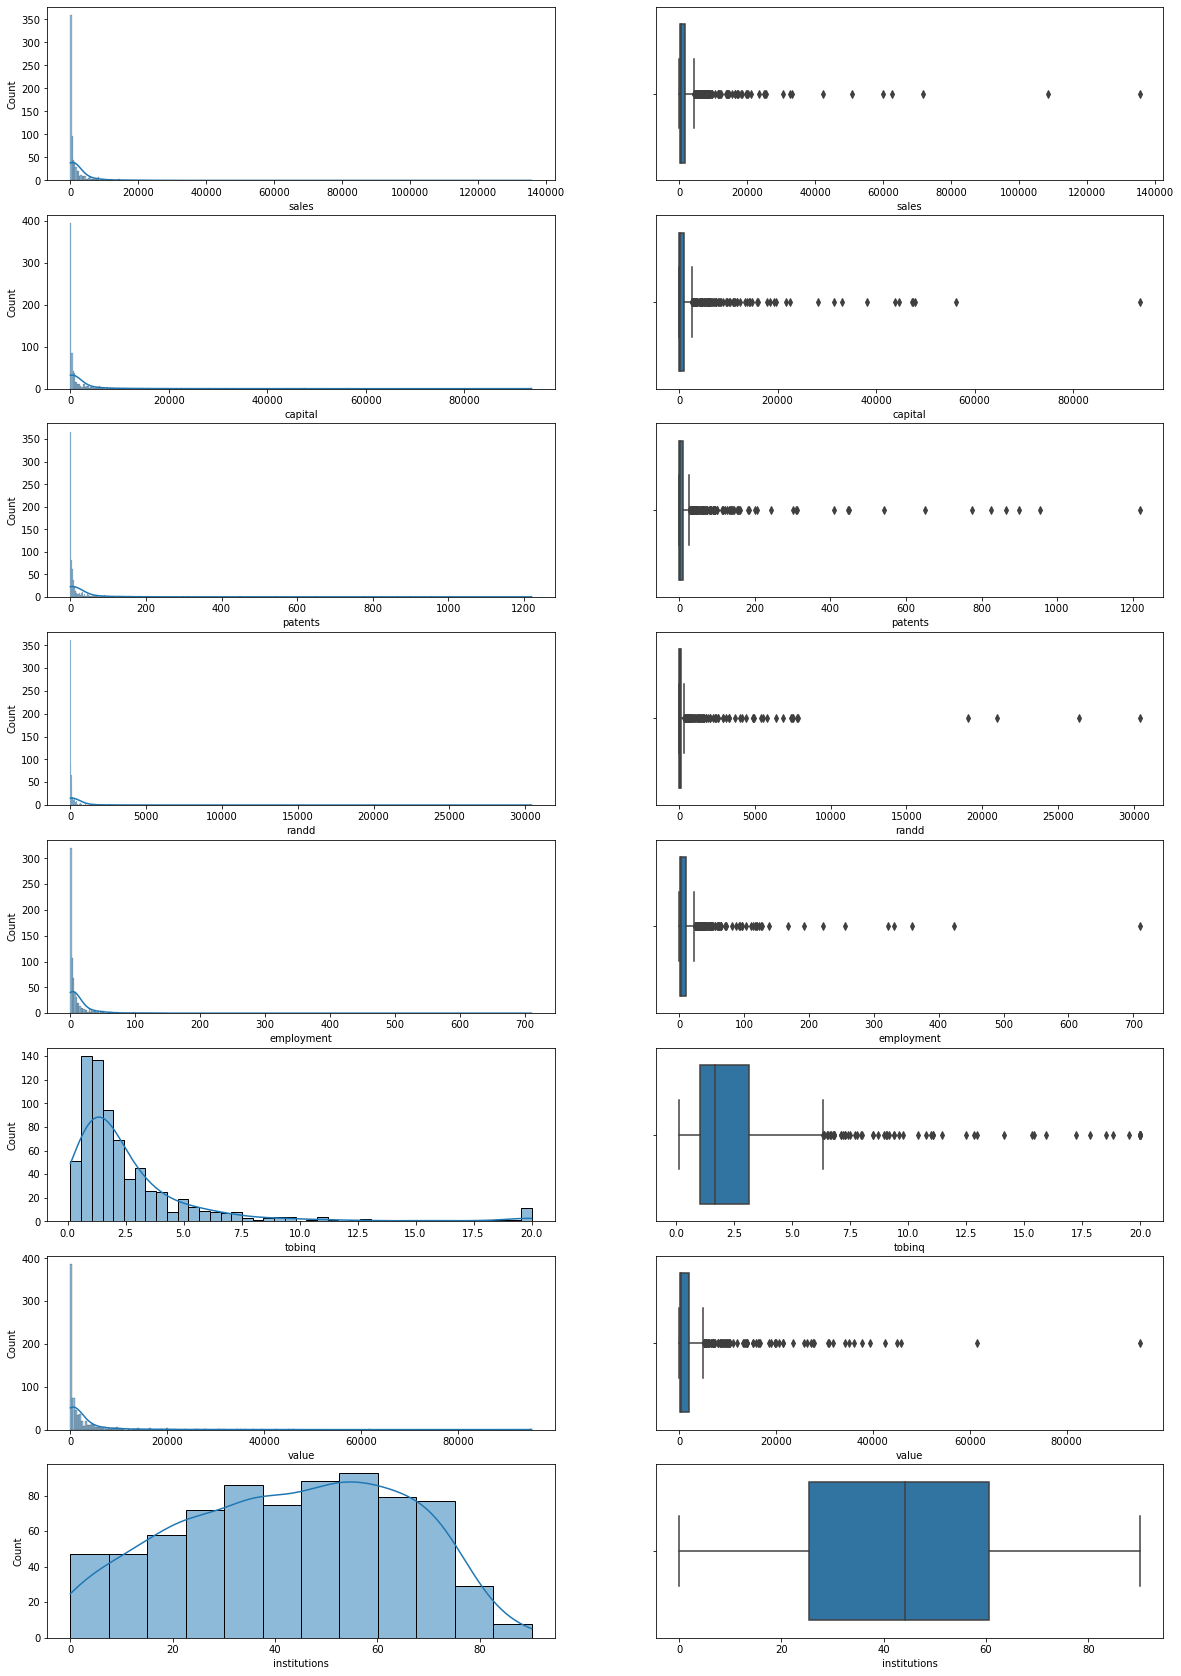

In [35]:
fig,axes = plt.subplots(nrows = 8,ncols = 2,figsize = (20,30))
x = 0

for i in df1.columns:
    if df1[i].dtypes != 'object':
        sns.histplot(df[i],kde = True, ax = axes[x][0])
        sns.boxplot(df[i],data = df1, ax = axes[x][1])
        x = x+1
plt.show()

#### Insights:
We can see that there are a lot of outliers present for the numerical fields resulting in the extreme skewness of the plots. Hence we need to go for outlier treatment.

In [36]:
#Outlier treatment:

In [37]:
Q1 = df1['sales'].quantile(0.25)
Q3 = df1['sales'].quantile(0.75)
IQR = Q3-Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

In [38]:
lower_range

-2426.5210496249997

In [39]:
upper_range

4371.988416175

In [40]:
df1[df1['sales']>upper_range].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2 to 752
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         100 non-null    float64
 1   capital       100 non-null    float64
 2   patents       100 non-null    int64  
 3   randd         100 non-null    float64
 4   employment    100 non-null    float64
 5   sp500         100 non-null    object 
 6   tobinq        100 non-null    float64
 7   value         100 non-null    float64
 8   institutions  100 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.8+ KB


In [41]:
# We can see that there are 100 data points which are posing as outliers for the 'sales' field.

In [42]:
#Using capping for treating outliers:

for i in df1.columns:
    if df1[i].dtypes != 'object':
        Q1 = df1[i].quantile(0.25)
        Q3 = df1[i].quantile(0.75)
        IQR = Q3-Q1
        lower_range = Q1-(1.5*IQR)
        upper_range = Q3+(1.5*IQR)
        df1[i]=np.where(df1[i]>upper_range,upper_range,df1[i])
        df1[i]=np.where(df1[i]<lower_range,lower_range,df1[i])

In [43]:
#Checking the outliers after treatment:

In [44]:
Q1 = df1['sales'].quantile(0.25)
Q3 = df1['sales'].quantile(0.75)
IQR = Q3-Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

df1[df1['sales']>upper_range].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         0 non-null      float64
 1   capital       0 non-null      float64
 2   patents       0 non-null      float64
 3   randd         0 non-null      float64
 4   employment    0 non-null      float64
 5   sp500         0 non-null      object 
 6   tobinq        0 non-null      float64
 7   value         0 non-null      float64
 8   institutions  0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 0.0+ bytes


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

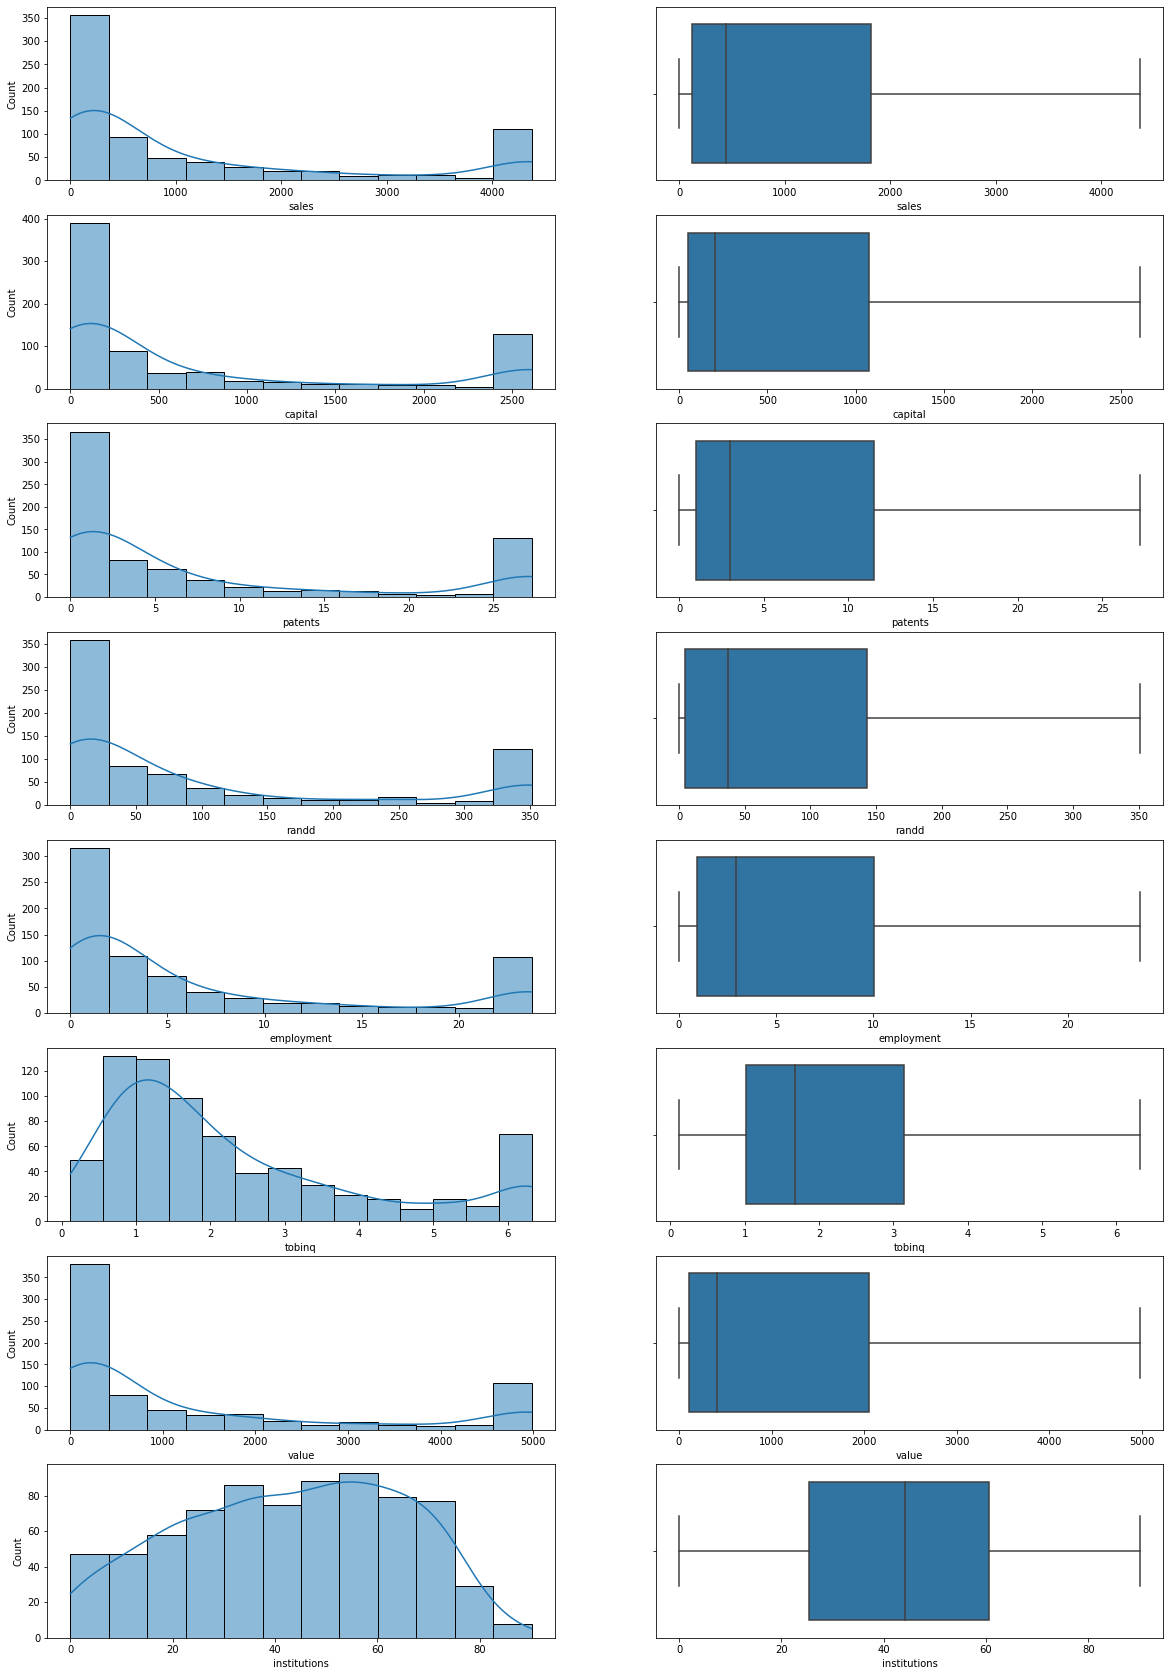

In [45]:
#Plotting the plots after outlier treatment:

fig,axes = plt.subplots(nrows = 8,ncols = 2,figsize = (20,30))
x = 0

for i in df1.columns:
    if df1[i].dtypes != 'object':
        sns.histplot(df1[i],kde = True, ax = axes[x][0])
        sns.boxplot(df1[i],data = df1, ax = axes[x][1])
        x = x+1
plt.show()

We can see that the ouliers have been treated sucessfully.

#### Insights from Univariate Analysis:
1. From the 'sales' plot, we can see that more than 500 companies have sales less than or equal to 1000 million dollars.
2. From the 'capital' plot, we see that majority(<75%) of the companies have capital less than 500.
3. From the 'patents' plot, we observe that majority of the companies have 0 to 5 patents.
4. From the 'tobinq' plot, we can see that most of the companies have the values from 0.5 to 2 tobinq ratio value.
5. All the fields (except 'institutions') are heavily right skewed. This means that there are less number of companies which are doing exceptionally well in terms of sales, capital and working efficiency.

### Bivariate Analysis:

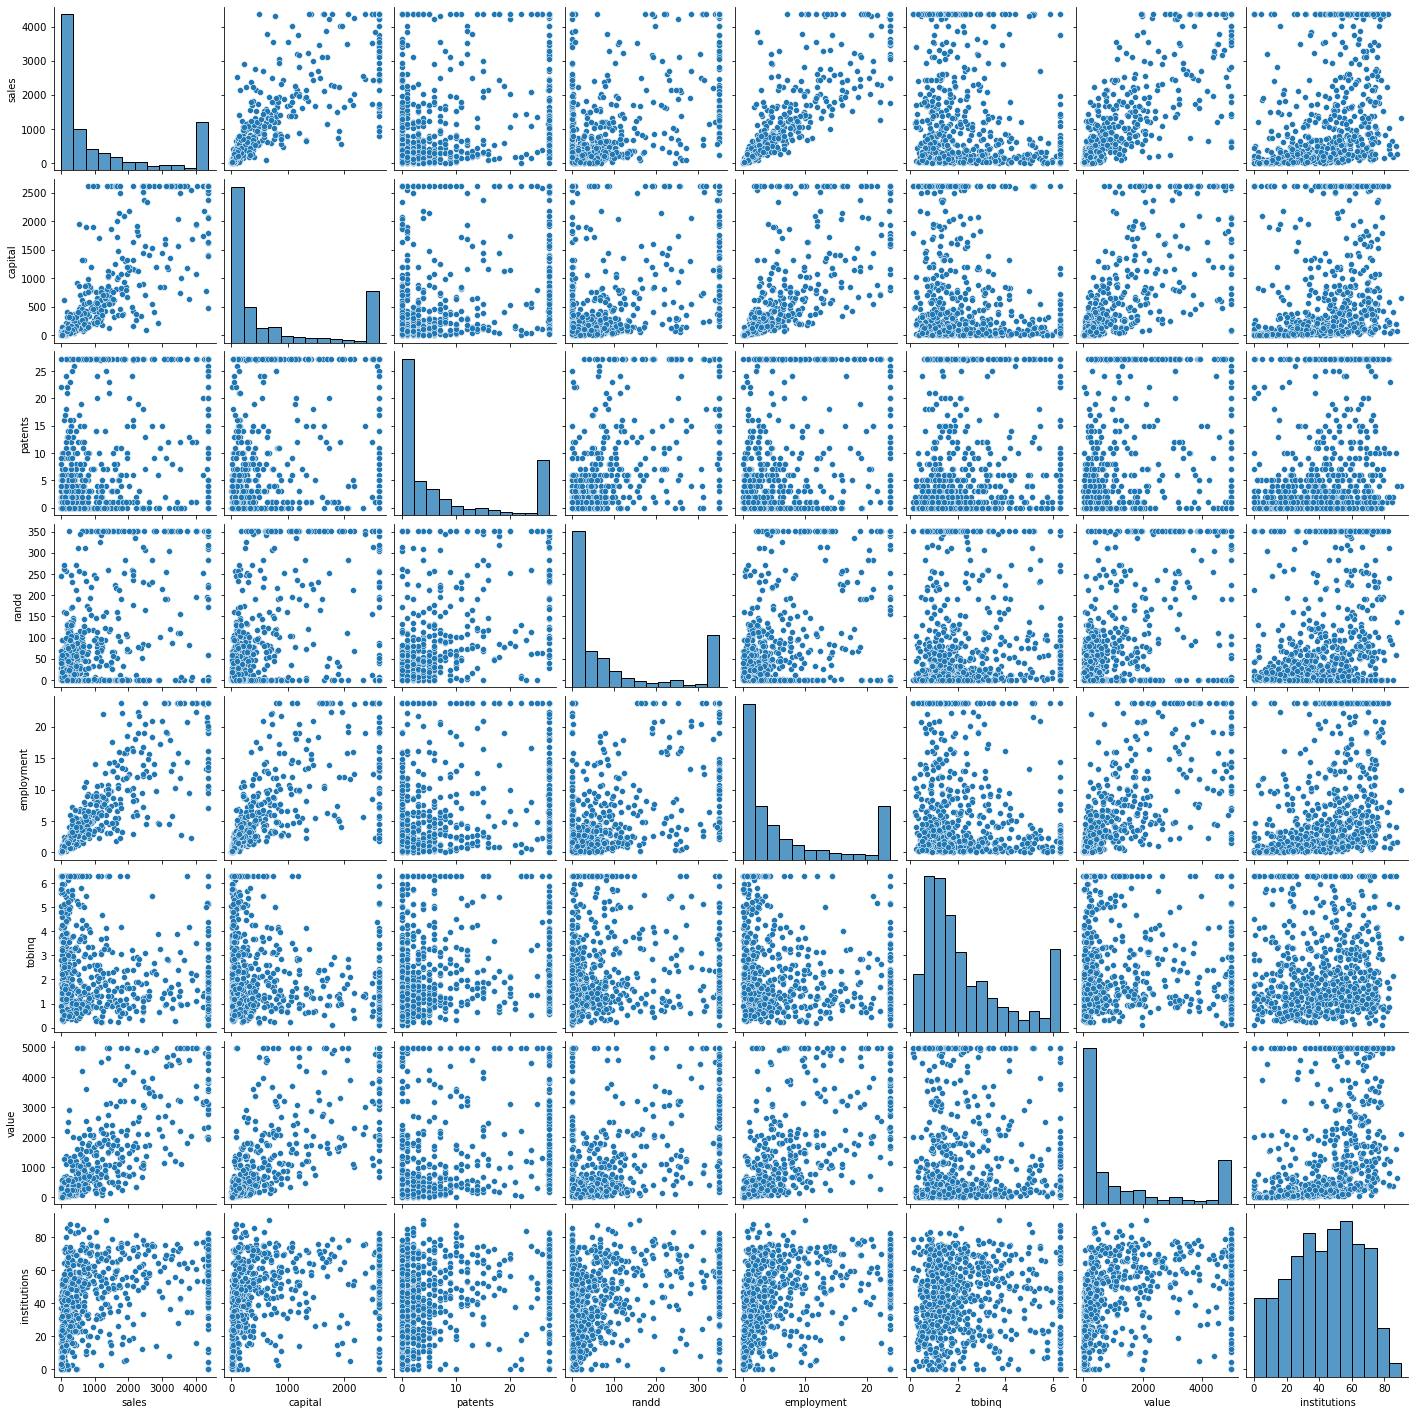

In [46]:
sns.pairplot(df1)
plt.show()

#### Insights:
1. We see a decent positive correlation pattern between sales and capital. This is because of the fact that in order to generate high sales, the company needs to maintain high capital as well.
2. We see a strong positive correlation pattern between sales and employment, since high sales imply that the company is profitable and comfortable hiring high number of employees. Inversely, the higher number of employees, they help generate more sales.
3. We see a decent positive correlation pattern between sales and value, indicating that high sales generating companies are valued higher in terms of stock prices.

<AxesSubplot:>

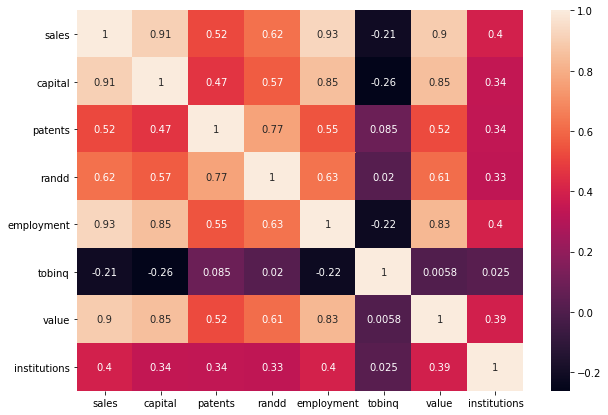

In [47]:
#Heatmap:
figsize = (10,7)
plt.figure(figsize = (10,7))
sns.heatmap(df1.corr(),annot = True)

#### Insights from the heatmap:
1. We can observe similar case where sales is highly positively correlated with capital, value, employment, randd.
2. We can observe that sales has decent correlation with the number of patents the company holds as well as randd, since good RD helps in high sales for the company.
3. We also see that randd is heavily positively correlated with number of patents company holds.
4. We also observe that the tobinq value is slightly negatively correlated with sales, meaning higher the sales, lower the tobin1 value.

### 1.2) Impute null values if present? Do you think scaling is necessary in this case?

In [48]:
df1.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [49]:
df1['tobinq'].describe()

count    738.000000
mean       2.332875
std        1.777151
min        0.119001
25%        1.018783
50%        1.680303
75%        3.139309
max        6.320098
Name: tobinq, dtype: float64

In [50]:
df1[df1['tobinq'].isnull()].index

Int64Index([ 14,  22,  38,  39,  45,  60, 103, 120, 123, 263, 288, 312, 390,
            435, 461, 525, 542, 569, 636, 702, 755],
           dtype='int64')

In [51]:
df1['tobinq'].fillna(df1['tobinq'].median(),inplace = True)

In [52]:
df1['tobinq'].isnull().sum()

0

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    float64
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(8), object(1)
memory usage: 53.5+ KB


We see that the null values have been handled.

### Scaling:

In [54]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sales,759,NaN,NaN,NaN,1236.09,1528.69,0.138,122.92,448.577,1822.55,4371.99
capital,759,NaN,NaN,NaN,728.716,959.395,0.057,52.6505,202.179,1075.79,2610.5
patents,759,NaN,NaN,NaN,7.8004,9.95268,0,1,3,11.5,27.25
randd,759,NaN,NaN,NaN,99.5127,127.195,0,4.62826,36.8641,143.253,351.191
employment,759,NaN,NaN,NaN,6.92538,8.18419,0.006,0.9275,2.924,10.05,23.7338
sp500,759,2,no,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tobinq,759,NaN,NaN,NaN,2.31482,1.75563,0.119001,1.036,1.6803,3.08298,6.3201
value,759,NaN,NaN,NaN,1375.43,1754.49,1.97105,103.594,410.794,2054.16,4980.01
institutions,759,NaN,NaN,NaN,43.0205,21.6856,0,25.395,44.11,60.51,90.15


From the above data, we see that different fields have different scales of data. Hence we need to scale the data to cure the data set from being influenced by heavy weightages of field with respect to the data it stores.

In [55]:
#Breaking the data set into categorical and numerical fields:

In [56]:
cat = df1.select_dtypes(include = 'object')
num = df1.select_dtypes(exclude = 'object')

In [57]:
cat.head()

,sp500
0,no
1,no
2,yes
3,no
4,no


In [58]:
num.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions
0,826.995050,161.603986,10.00,351.191114,2.306000,6.320098,1625.453755,80.27
1,407.753973,122.101012,2.00,0.000000,1.860000,0.844187,243.117082,59.02
2,4371.988416,2610.499299,27.25,351.191114,23.733752,5.205257,4980.010044,47.70
3,451.000010,266.899987,1.00,83.540161,3.071000,0.305221,63.024630,26.88
4,174.927981,140.124004,2.00,14.233637,1.947000,1.063300,67.406408,49.46


We need to perform the scaling function on the numerical data set.

In [59]:
#Using Standard scaler for Standardisation:
from sklearn.preprocessing import StandardScaler

In [60]:
ss = StandardScaler().fit(num)
num_std = ss.transform(num)
num_std

array([[-0.26778788, -0.59150406,  0.22115192, ...,  2.28289468,
         0.14259823,  1.71883858],
       [-0.54221721, -0.63270611, -0.5831814 , ..., -0.83821862,
        -0.64580663,  0.73827886],
       [ 2.0527151 ,  1.96272162,  1.95549565, ...,  1.64746702,
         2.05584306,  0.21592893],
       ...,
       [-0.67642502, -0.63080159,  0.52277692, ...,  1.66141224,
        -0.45342243, -0.0355558 ],
       [-0.29482693, -0.6153087 , -0.18101474, ..., -0.3929508 ,
        -0.60769547,  0.84764011],
       [-0.79426684, -0.74520116, -0.2815564 , ..., -0.05799447,
        -0.77366419, -1.63905933]])

In [61]:
num_std = pd.DataFrame(num_std,columns = num.columns)
num_std.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,2.282895,0.142598,1.718839
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.838219,-0.645807,0.738279
2,2.052715,1.962722,1.955496,1.979986,2.055116,1.647467,2.055843,0.215929
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-1.145414,-0.748521,-0.744789
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.713331,-0.746022,0.297142


In [62]:
num_std.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,4.300469e-17,1.000659,-0.809037,-0.728666,-0.515495,0.383887,2.052715
capital,759.0,7.606271e-18,1.000659,-0.759999,-0.705144,-0.549184,0.362002,1.962722
patents,759.0,5.046468e-18,1.000659,-0.784265,-0.683723,-0.482640,0.371964,1.955496
randd,759.0,-5.573056e-17,1.000659,-0.782879,-0.746467,-0.492864,0.344114,1.979986
employment,759.0,4.358978e-17,1.000659,-0.846015,-0.733345,-0.489238,0.382039,2.055116
tobinq,759.0,-2.918175e-17,1.000659,-1.251554,-0.728891,-0.361656,0.437829,2.282895
value,759.0,4.534508e-18,1.000659,-0.783342,-0.725383,-0.550174,0.387108,2.055843
institutions,759.0,1.518329e-16,1.000659,-1.985139,-0.813313,0.050272,0.807033,2.174741


We can see that the numerical part of the data set has been scaled successfully as the standard deviation of all the fields ~ 1 and mean of all the fields ~ 0

In [63]:
#Combining the numerical and the categorical part of the data back:
df2 = pd.concat([num_std,cat],axis = 1)
df2.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,2.282895,0.142598,1.718839,no
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.838219,-0.645807,0.738279,no
2,2.052715,1.962722,1.955496,1.979986,2.055116,1.647467,2.055843,0.215929,yes
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-1.145414,-0.748521,-0.744789,no
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.713331,-0.746022,0.297142,no


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    float64
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        759 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
 8   sp500         759 non-null    object 
dtypes: float64(8), object(1)
memory usage: 53.5+ KB


In [65]:
df2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sales,759,NaN,NaN,NaN,4.30047e-17,1.00066,-0.809037,-0.728666,-0.515495,0.383887,2.05272
capital,759,NaN,NaN,NaN,7.60627e-18,1.00066,-0.759999,-0.705144,-0.549184,0.362002,1.96272
patents,759,NaN,NaN,NaN,5.04647e-18,1.00066,-0.784265,-0.683723,-0.48264,0.371964,1.9555
randd,759,NaN,NaN,NaN,-5.57306e-17,1.00066,-0.782879,-0.746467,-0.492864,0.344114,1.97999
employment,759,NaN,NaN,NaN,4.35898e-17,1.00066,-0.846015,-0.733345,-0.489238,0.382039,2.05512
tobinq,759,NaN,NaN,NaN,-2.91818e-17,1.00066,-1.25155,-0.728891,-0.361656,0.437829,2.28289
value,759,NaN,NaN,NaN,4.53451e-18,1.00066,-0.783342,-0.725383,-0.550174,0.387108,2.05584
institutions,759,NaN,NaN,NaN,1.51833e-16,1.00066,-1.98514,-0.813313,0.050272,0.807033,2.17474
sp500,759,2,no,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We finally have our scaled data set.

### 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE.

We see that the field sp500 has only 2 unique values i.e 'yes' or 'no'. Hence we can go ahead with One hot encoding since the number of the categories is very less and the categories are nominal and not ordinal in nature.

In [66]:
df2['sp500'] = df2['sp500'].astype('category')

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sales         759 non-null    float64 
 1   capital       759 non-null    float64 
 2   patents       759 non-null    float64 
 3   randd         759 non-null    float64 
 4   employment    759 non-null    float64 
 5   tobinq        759 non-null    float64 
 6   value         759 non-null    float64 
 7   institutions  759 non-null    float64 
 8   sp500         759 non-null    category
dtypes: category(1), float64(8)
memory usage: 48.4 KB


In [68]:
df2['sp500'] = df2['sp500'].cat.codes
df2.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,2.282895,0.142598,1.718839,0
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.838219,-0.645807,0.738279,0
2,2.052715,1.962722,1.955496,1.979986,2.055116,1.647467,2.055843,0.215929,1
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-1.145414,-0.748521,-0.744789,0
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.713331,-0.746022,0.297142,0


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    float64
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        759 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
 8   sp500         759 non-null    int8   
dtypes: float64(8), int8(1)
memory usage: 48.3 KB


In [70]:
# We can see that the encoding of the categorical field has been completed sucessfully. The data is now ready for modelling.

### Modelling:

We know that our target variable is 'sales'. Hence we need to divide the data into target and predictors.

In [71]:
x = df2.drop('sales',axis = 1)
x.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500
0,-0.591504,0.221152,1.979986,-0.564800,2.282895,0.142598,1.718839,0
1,-0.632706,-0.583181,-0.782879,-0.619331,-0.838219,-0.645807,0.738279,0
2,1.962722,1.955496,1.979986,2.055116,1.647467,2.055843,0.215929,1
3,-0.481679,-0.683723,-0.125658,-0.471265,-1.145414,-0.748521,-0.744789,0
4,-0.613908,-0.583181,-0.670901,-0.608694,-0.713331,-0.746022,0.297142,0


In [72]:
y = df2['sales']
y.head()

0   -0.267788
1   -0.542217
2    2.052715
3   -0.513909
4   -0.694622
Name: sales, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [75]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [76]:
# We have trained our model with the train data.

In [77]:
#Let us generate the predicted value with the trained model:

In [78]:
y_train_pred = lm.predict(x_train)

In [79]:
y_test_pred = lm.predict(x_test)

### Metrics:

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [81]:
#Checking the R-square/score for the model:

In [82]:
r2_train = lm.score(x_train,y_train)
r2_train

0.9359715200852444

In [83]:
r2_test = lm.score(x_test,y_test)
r2_test

0.9240495997132001

In [84]:
#Checking the RMSE for the model:

In [85]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

In [86]:
print(rmse_train)
print(rmse_test)

0.25812503062127173
0.26180394695123227


In [87]:
r2 = []
rmse = []
r2.append(r2_train)
r2.append(r2_test)
rmse.append(rmse_train)
rmse.append(rmse_test)
print(r2)
print(rmse)

[0.9359715200852444, 0.9240495997132001]
[0.25812503062127173, 0.26180394695123227]


In [88]:
metric_results = pd.DataFrame({'R-square':r2,'RMSE':rmse},index = ['Train','Test'])
metric_results

,R-square,RMSE
Train,0.935972,0.258125
Test,0.924050,0.261804


### Insights:
1. For our predicted model, we see that the rmse values for the train and the test set is really close, which inferences that the model has good performance and is neither under or over fit.

## 1.4) Inference: Based on these predictions, what are the business insights and recommendations.

### Feature Importances:

In [89]:
for i, col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,lm.coef_[i]))

The coeff for capital is 0.2543589175464542
The coeff for patents is -0.030303993904159714
The coeff for randd is 0.05302671262183546
The coeff for employment is 0.420536471943131
The coeff for tobinq is -0.04621510884619222
The coeff for value is 0.2817675331188635
The coeff for institutions is 0.0029600026038742464
The coeff for sp500 is 0.10987864403782022


In [90]:
#Comparing sales with predicted sales:

In [91]:
y_train_pred_df = pd.DataFrame(y_train_pred)
y_test_pred_df = pd.DataFrame(y_test_pred,index = np.arange(531,759))

In [92]:
y_train_pred_df

,0
0,0.738727
1,-0.736044
2,-0.185089
3,0.266008
4,-0.568610
...,...
526,0.251096
527,-0.476734
528,-0.678255
529,-0.741036


In [93]:
y_test_pred_df

,0
531,-0.688586
532,-0.557451
533,0.892876
534,-0.714756
535,-0.442861
...,...
754,0.368715
755,0.520529
756,-0.431950
757,-0.689846


In [94]:
y_pred = pd.concat([y_train_pred_df,y_test_pred_df],axis = 0)
y_pred

,0
0,0.738727
1,-0.736044
2,-0.185089
3,0.266008
4,-0.568610
...,...
754,0.368715
755,0.520529
756,-0.431950
757,-0.689846


In [95]:
df2['pred_sales'] = y_pred
df2.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500,pred_sales
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,2.282895,0.142598,1.718839,0,0.738727
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.838219,-0.645807,0.738279,0,-0.736044
2,2.052715,1.962722,1.955496,1.979986,2.055116,1.647467,2.055843,0.215929,1,-0.185089
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-1.145414,-0.748521,-0.744789,0,0.266008
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.713331,-0.746022,0.297142,0,-0.568610


In [96]:
df3 = df2[df2['sales']>df2['pred_sales']]
df3

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500,pred_sales
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.838219,-0.645807,0.738279,0,-0.736044
2,2.052715,1.962722,1.955496,1.979986,2.055116,1.647467,2.055843,0.215929,1,-0.185089
8,-0.615835,-0.634890,-0.281556,0.547942,-0.664081,0.533667,-0.576532,-0.460542,0,-0.981613
10,-0.565461,-0.684843,-0.382098,0.008008,-0.653321,2.282895,-0.209707,1.232942,0,-0.572816
15,1.369139,1.962722,1.955496,1.979986,0.874165,-0.635976,1.931186,1.344611,1,0.783728
...,...,...,...,...,...,...,...,...,...,...
744,-0.557712,-0.636316,-0.784265,-0.676676,-0.508068,0.021310,-0.649430,-1.250988,0,-0.766654
745,0.593359,0.614782,-0.181015,0.605453,0.151076,-0.514927,0.191704,1.352917,0,-0.698612
750,0.125951,-0.185488,1.528194,-0.775464,-0.027557,2.282895,2.055843,-0.986122,1,-0.306156
752,2.052715,1.962722,1.955496,1.979986,2.055116,-0.872096,2.055843,1.662081,1,-0.053048


In [97]:
#Exporting the curated data set:

In [98]:
df3.to_csv('curated_firms.csv',index = True)

### Business Insights:
1. Since we are working for an investment firm, we need to look at the firm data with a view of generating insights so that our firm's investment is safe and profitable.

2. We see that the top 5 most important and influencing predictors for the sales are:
       i) employment
       ii) value
       iii) capital
       iv) sp500
       v) randd
This helps us to understand which predictors need to be given priorities while choosing the firms for an investment     opportunity.

3. By building a predictive model, we see that our model has an accuracy(r-square) of ~92%. The firms which perform better in sales thn our predicted sales are good options while being considered for an investment.
4. We successfully decreased the universe of the firms by choosing firms which did better than the predicted model values and we got 383 firms.
5. From the curated data set, we can sort the firms on the order of the influencing predictors.
6. From the above steps, we can extract the top 20-50 firms from the data set which might be the safest and most profitable investment options for our company.

### Problem 2: Logistic Regression and Linear Discriminant Analysis:

You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your
predictions.

Data Dictionary for Car_Crash:
    
1. dvcat: factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying
sampling probabilities. (The inverse probability weighting estimator can be used to demonstrate
causality when the researcher cannot conduct a controlled experiment but has observed data to
model)
3. Survived: factor with levels Survived or not_survived
4. airbag: a factor with levels none or airbag
5. seatbelt: a factor with levels none or belted
6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact
7. sex: a factor with levels f: Female or m: Male
8. ageOFocc: age of occupant in years
9. yearacc: year of accident
10. yearVeh: Year of model of vehicle; a numeric vector
11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy,
nodeploy and unavail
12. occRole: a factor with levels driver or pass: passenger
13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags
deployed.
14. injSeverity: a numeric vector; 0: none, 1: possible injury, 2: no incapacity, 3: incapacity, 4: killed;
5: unknown, 6: prior death
15. caseid: character, created by pasting together the populations sampling unit, the case number,
and the vehicle number. Within each year, use this to uniquely identify the vehicle.


### 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. (8 marks)

In [99]:
car = pd.read_csv('Car_Crash (1).csv')

In [100]:
car.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [101]:
car.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
11216,11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


In [102]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [103]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11217.0,5608.000000,3238.213319,0.0,2804.000,5608.000,8412.000,11216.00
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.00
injSeverity,11140.0,1.825583,1.378535,0.0,1.000,2.000,3.000,5.00


In [104]:
#Checking for null values:

In [105]:
car.shape

(11217, 16)

In [106]:
car.isnull().sum()

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [107]:
#Checking for the duplicate values:

In [108]:
car.duplicated().sum()

0

In [109]:
#Checking the data type for each field:

In [110]:
car.dtypes

Unnamed: 0       int64
dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

#### Insights:
1. We can see that there are 16 fields out of which the target field is the 'Survived'.
2. We observe that there is  field 'Unnamed: 0', which is the unique identifier for the data set. We will have to drop this field.
3. There are 8 object data type fields while the rest of it are int/float.
4. Looking at the description of the data, for the numerical fields, there is a large difference between the values that each field holds, which might require the scaling of the data.
5. There is only one field: 'injSeverity' which contains null values.
6. The data set does not contain any duplicate values.
7. Checking the data type for each field,
8. While checking the data dictionary, we find that the fields 'abcat' and 'deploy' mean the same factor. Hence we can drop one of them.
9. We also see that the field 'caseid' contains unique values about the accident case, hence can be dropped.
10. The data type is sync with the data given  in the data set. No field is miscast.

In [111]:
#Removing the unique identifier fields:

In [112]:
car1 = car.copy()

In [113]:
car1.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [114]:
car1.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
11216,11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


In [115]:
car1.shape

(11217, 16)

In [116]:
car1.drop(['Unnamed: 0','caseid','abcat'],axis = 1,inplace = True)
car1.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,driver,0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,driver,0,4.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,driver,0,4.0


In [117]:
# Feature Engineering:

Creating a field from the difference between 'yearacc' and 'yearVeh', showcasing the number of years before the accident occurred:

In [118]:
car1['VehAcc_years'] = car1['yearacc'] - car1['yearVeh']

In [119]:
car1.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,VehAcc_years
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,driver,0,4.0,10.0
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,driver,0,4.0,3.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,driver,0,4.0,5.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,pass,0,4.0,5.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,driver,0,4.0,11.0


#### Univariate Analysis:

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

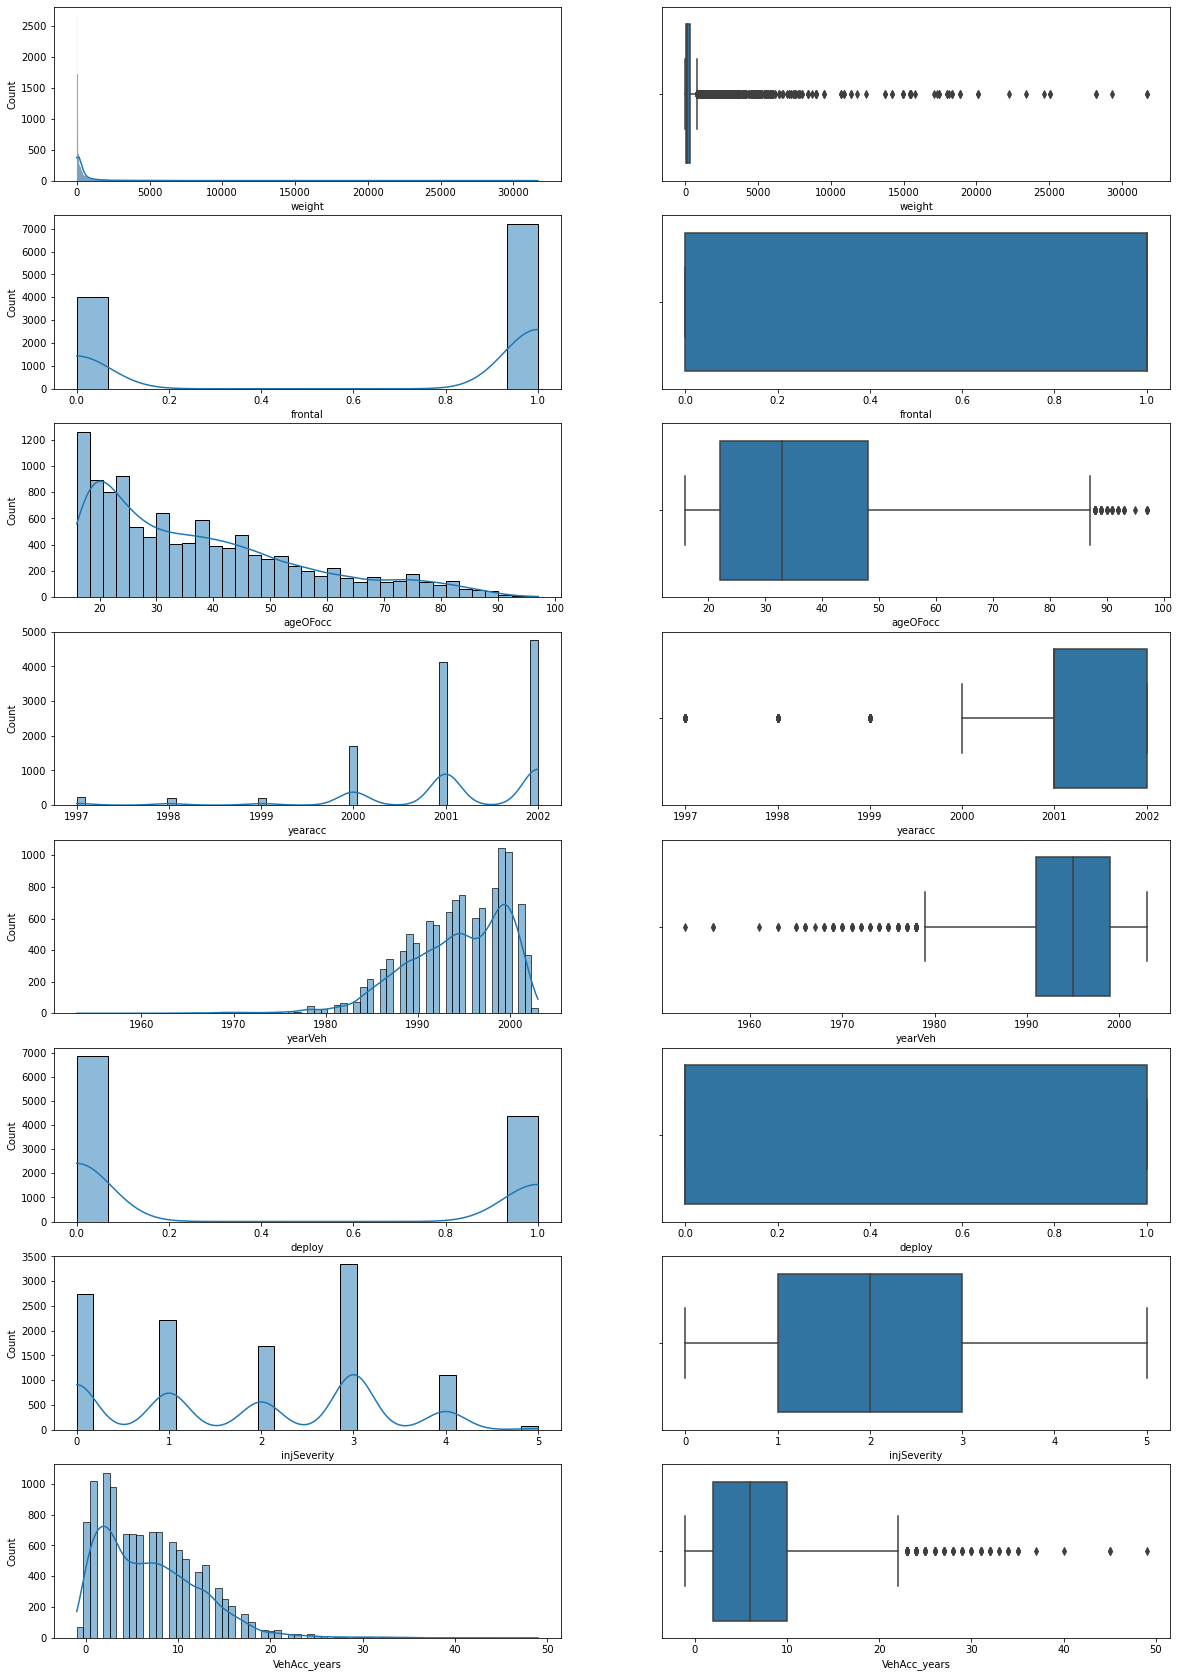

In [120]:
fig,axes = plt.subplots(nrows = 8,ncols = 2,figsize = (20,30))
x = 0

for i in car1.columns:
    if car1[i].dtypes != 'object':
        sns.histplot(car1[i],kde = True, ax = axes[x][0])
        sns.boxplot(car1[i],data = df1, ax = axes[x][1])
        x = x+1
plt.show()

#### Insights:
We can see that there are a lot of outliers present for the numerical fields resulting in the extreme skewness of the plots. Hence we need to go for outlier treatment.

In [121]:
#Outlier treatment:

In [122]:
Q1 = car1['weight'].quantile(0.25)
Q3 = car1['weight'].quantile(0.75)
IQR = Q3-Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

In [123]:
lower_range

-415.353999997256

In [124]:
upper_range

767.7019999951584

In [125]:
car1[car1['weight']>upper_range].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 354 to 11212
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dvcat         1412 non-null   object 
 1   weight        1412 non-null   float64
 2   Survived      1412 non-null   object 
 3   airbag        1412 non-null   object 
 4   seatbelt      1412 non-null   object 
 5   frontal       1412 non-null   int64  
 6   sex           1412 non-null   object 
 7   ageOFocc      1412 non-null   int64  
 8   yearacc       1412 non-null   int64  
 9   yearVeh       1412 non-null   float64
 10  occRole       1412 non-null   object 
 11  deploy        1412 non-null   int64  
 12  injSeverity   1393 non-null   float64
 13  VehAcc_years  1412 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 165.5+ KB


We can see that there are about 1400 data points which are posing as outliers for the 'weight' field. Since the number of outliers is about 10% of the total number of data points, we can use capping for treating the outliers.

In [126]:
#Using capping for treating outliers:

for i in car1.columns:
    if car1[i].dtypes != 'object':
        Q1 = car1[i].quantile(0.25)
        Q3 = car1[i].quantile(0.75)
        IQR = Q3-Q1
        lower_range = Q1-(1.5*IQR)
        upper_range = Q3+(1.5*IQR)
        car1[i]=np.where(car1[i]>upper_range,upper_range,car1[i])
        car1[i]=np.where(car1[i]<lower_range,lower_range,car1[i])

In [127]:
#Checking the outliers after treatment:

Q1 = car1['weight'].quantile(0.25)
Q3 = car1['weight'].quantile(0.75)
IQR = Q3-Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

In [128]:
car1[car1['weight']>upper_range].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dvcat         0 non-null      object 
 1   weight        0 non-null      float64
 2   Survived      0 non-null      object 
 3   airbag        0 non-null      object 
 4   seatbelt      0 non-null      object 
 5   frontal       0 non-null      float64
 6   sex           0 non-null      object 
 7   ageOFocc      0 non-null      float64
 8   yearacc       0 non-null      float64
 9   yearVeh       0 non-null      float64
 10  occRole       0 non-null      object 
 11  deploy        0 non-null      float64
 12  injSeverity   0 non-null      float64
 13  VehAcc_years  0 non-null      float64
dtypes: float64(8), object(6)
memory usage: 0.0+ bytes


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

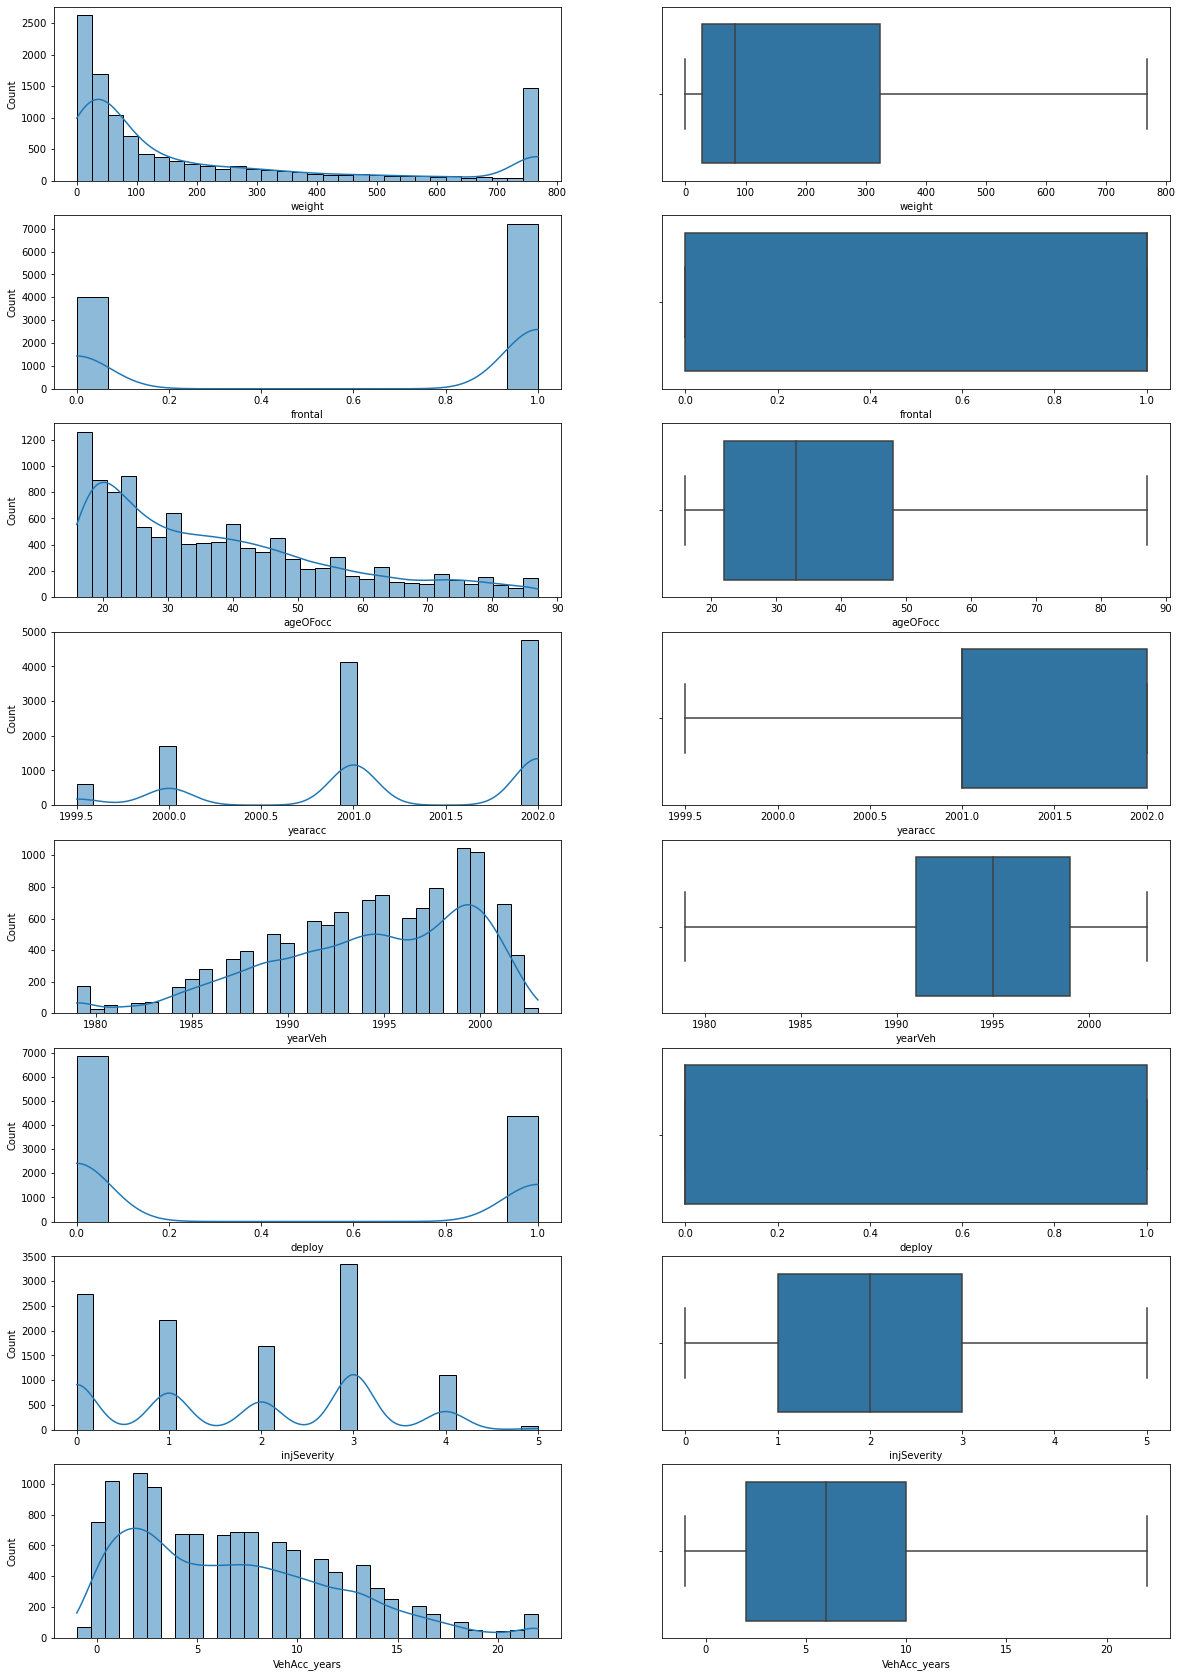

In [129]:
#Plotting the plots after outlier treatment:

fig,axes = plt.subplots(nrows = 8,ncols = 2,figsize = (20,30))
x = 0

for i in car1.columns:
    if car1[i].dtypes != 'object':
        sns.histplot(car1[i],kde = True, ax = axes[x][0])
        sns.boxplot(car1[i],data = df1, ax = axes[x][1])
        x = x+1
plt.show()

We can see that the outliers have been treated.

#### Insights from Univariate Analysis:
1. From the 'weight' plot, we can see that majority vehichles have weight less than or equal to 300.
2. From the 'ageOFocc' plot, we see that majority of the occupants' lie between 20 to 40.
3. From the 'yearacc' plot, we observe that the accident count has been increasing for every subsequent years.
4. From the 'yearVeh' plot, we can see that highest number of the vehichles have been made around the year 2000.
5. From the 'deploy' plot, the cases where airbags did not deploy are higher than the ones where they deployed, by 60%.
6. The injury severity is highest for the third category (incapacity).
7. From the 'VehAcc_years', the cases are the highest for a difference of 10years or lesser. 

#### Bivariate Analysis:

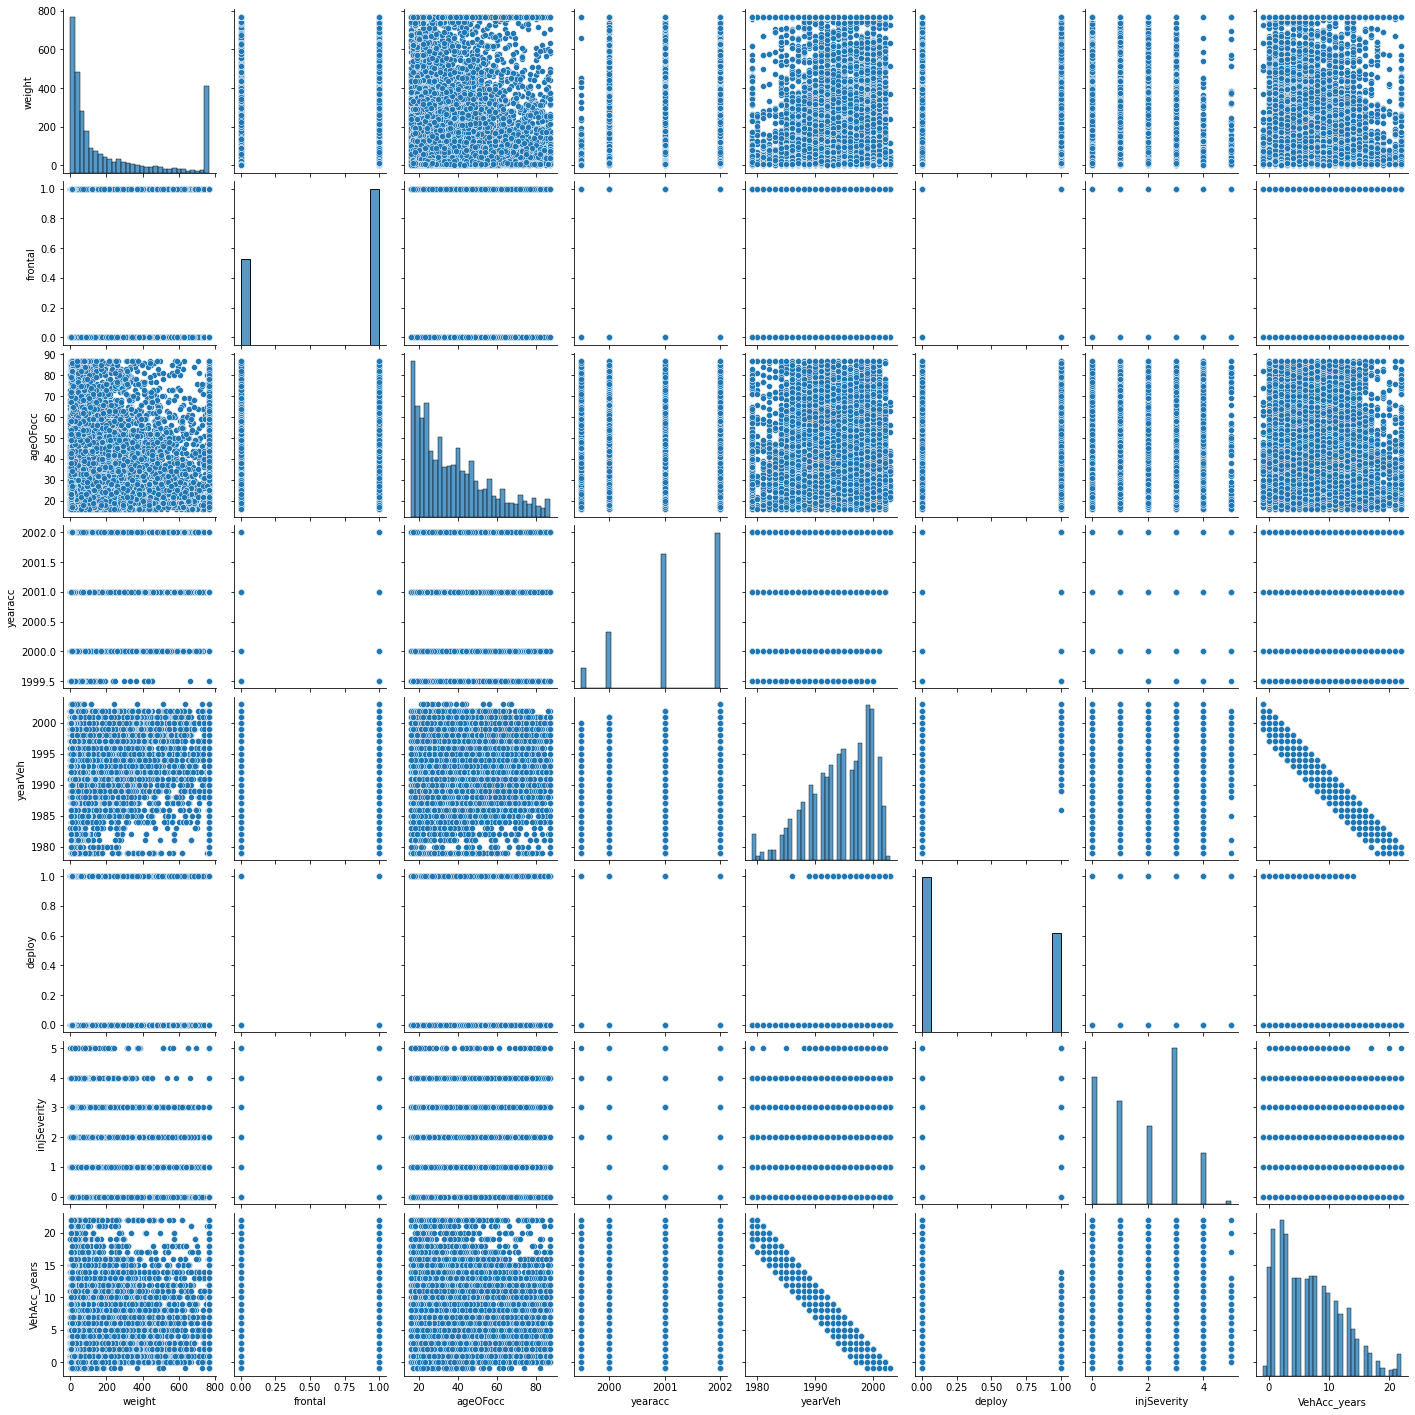

In [130]:
sns.pairplot(car1)
plt.show()

<AxesSubplot:>

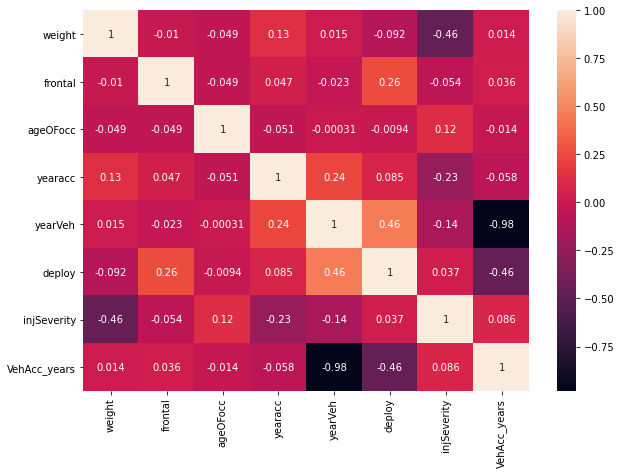

In [131]:
#Heatmap:
figsize = (10,7)
plt.figure(figsize = (10,7))
sns.heatmap(car1.corr(),annot = True)

#### Insights:
1. We see a decent negative correlation betwee injSeverity and weight, hinting that higher the weight of the vehichle, the less the injury severity.
2. We see a good negative correlation between VehAcc_years and deploy, showcasing that as the age of vehichle increases, the cases where the airbags deploy decreases.
3. We see a slight negative correlation between injSeverity and yearacc, telling us that as the years progress, the injury severity has decreased.
4. We see a decent positive correlation between frontal and deploy, telling us that the airbags were deployed more for the cases of frontal impacts.

#### Preparing Model Ready data:

In [132]:
# Handling null values:

In [133]:
car1.isnull().sum()

dvcat            0
weight           0
Survived         0
airbag           0
seatbelt         0
frontal          0
sex              0
ageOFocc         0
yearacc          0
yearVeh          0
occRole          0
deploy           0
injSeverity     77
VehAcc_years     0
dtype: int64

In [134]:
#Null values present in only the 'injSeverity'.

In [135]:
car1[car1['injSeverity'].isnull()]

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,VehAcc_years
767,10-24,10.579,survived,airbag,none,1.0,f,87.0,2000.0,2000.0,driver,1.0,NaN,0.0
1025,40-54,9.780,survived,none,none,1.0,f,87.0,2000.0,1984.0,driver,0.0,NaN,16.0
1121,40-54,23.081,survived,airbag,none,0.0,f,68.0,2000.0,1999.0,driver,0.0,NaN,1.0
1576,10-24,52.779,survived,airbag,belted,1.0,m,25.0,2000.0,1999.0,pass,0.0,NaN,1.0
1594,25-39,56.280,survived,airbag,belted,0.0,f,53.0,2000.0,1999.0,pass,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,10-24,548.186,survived,airbag,belted,1.0,m,25.0,2002.0,1999.0,pass,1.0,NaN,3.0
10464,10-24,440.426,survived,airbag,belted,1.0,m,22.0,2002.0,1999.0,pass,0.0,NaN,3.0
10980,10-24,20.409,survived,none,belted,1.0,f,17.0,2002.0,1987.0,pass,0.0,NaN,15.0
11042,25-39,392.914,survived,airbag,belted,1.0,f,59.0,2002.0,1999.0,pass,0.0,NaN,3.0


In [136]:
car1['injSeverity'].describe()

count    11140.000000
mean         1.825583
std          1.378535
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: injSeverity, dtype: float64

In [137]:
car1['injSeverity'].unique()

array([ 4.,  3.,  5.,  2.,  0.,  1., nan])

In [138]:
car1['injSeverity'].fillna(car1['injSeverity'].median(),inplace = True)

In [139]:
car1.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
occRole         0
deploy          0
injSeverity     0
VehAcc_years    0
dtype: int64

The null values have been imputed with median.

In [140]:
# Duplicate values:

In [141]:
car1.duplicated().sum()

15

In [142]:
car1[car1.duplicated()]

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,VehAcc_years
866,10-24,767.702,survived,airbag,belted,1.0,m,25.0,2000.0,1994.0,driver,1.0,0.0,6.0
4868,10-24,767.702,survived,none,belted,1.0,m,54.0,2001.0,1994.0,driver,0.0,0.0,7.0
5770,10-24,767.702,survived,airbag,belted,0.0,f,28.0,2001.0,2001.0,driver,0.0,1.0,0.0
5873,10-24,767.702,survived,airbag,belted,0.0,f,17.0,2001.0,1998.0,driver,0.0,0.0,3.0
5904,10-24,767.702,survived,none,belted,1.0,m,25.0,2001.0,1989.0,pass,0.0,0.0,12.0
5908,10-24,767.702,survived,none,belted,0.0,m,17.0,2001.0,1991.0,driver,0.0,0.0,10.0
6294,10-24,767.702,survived,airbag,belted,1.0,m,25.0,2001.0,1999.0,driver,1.0,0.0,2.0
7787,10-24,767.702,survived,airbag,belted,0.0,m,23.0,2002.0,1995.0,driver,0.0,0.0,7.0
8763,10-24,767.702,survived,airbag,belted,1.0,m,42.0,2002.0,2000.0,driver,0.0,0.0,2.0
8990,10-24,41.848,survived,airbag,belted,1.0,m,17.0,2002.0,1999.0,driver,1.0,0.0,3.0


In [143]:
car1.drop_duplicates(inplace = True)
car1.duplicated().sum()

0

The duplicate values have been handled.

In [144]:
#Anomaly values:

In [145]:
car1.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,VehAcc_years
0,55+,27.078,Not_Survived,none,none,1.0,m,32.0,1999.5,1987.0,driver,0.0,4.0,10.0
1,25-39,89.627,Not_Survived,airbag,belted,0.0,f,54.0,1999.5,1994.0,driver,0.0,4.0,3.0
2,55+,27.078,Not_Survived,none,belted,1.0,m,67.0,1999.5,1992.0,driver,0.0,4.0,5.0
3,55+,27.078,Not_Survived,none,belted,1.0,f,64.0,1999.5,1992.0,pass,0.0,4.0,5.0
4,55+,13.374,Not_Survived,none,none,1.0,m,23.0,1999.5,1986.0,driver,0.0,4.0,11.0


In [146]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11202 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dvcat         11202 non-null  object 
 1   weight        11202 non-null  float64
 2   Survived      11202 non-null  object 
 3   airbag        11202 non-null  object 
 4   seatbelt      11202 non-null  object 
 5   frontal       11202 non-null  float64
 6   sex           11202 non-null  object 
 7   ageOFocc      11202 non-null  float64
 8   yearacc       11202 non-null  float64
 9   yearVeh       11202 non-null  float64
 10  occRole       11202 non-null  object 
 11  deploy        11202 non-null  float64
 12  injSeverity   11202 non-null  float64
 13  VehAcc_years  11202 non-null  float64
dtypes: float64(8), object(6)
memory usage: 1.3+ MB


In [147]:
car1['injSeverity'].value_counts()

3.0    3336
0.0    2721
1.0    2217
2.0    1759
4.0    1101
5.0      68
Name: injSeverity, dtype: int64

There are no erronious categorised values for any of the 'object' fields.

In [148]:
car1['VehAcc_years'].unique()

array([10.,  3.,  5., 11.,  7.,  2.,  1., 16.,  8.,  4.,  9., 13.,  6.,
        0., 21., 18., 19., 22., 12., 14., 15., 20., 17., -1.])

For the field 'VehAcc_years', we see there is a negative value which is not possible since accidents cannot happen before vehicle manufacture, hence we need to remove the anomaly values.

In [149]:
car1[car1['VehAcc_years']<0]

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,VehAcc_years
227,25-39,13.284,Not_Survived,airbag,none,0.0,m,28.0,1999.5,1999.0,pass,1.0,4.0,-1.0
304,40-54,62.985,Not_Survived,airbag,none,1.0,m,40.0,1999.5,1999.0,driver,1.0,4.0,-1.0
494,40-54,18.164,Not_Survived,airbag,none,1.0,f,48.0,1999.5,2000.0,driver,1.0,4.0,-1.0
495,55+,18.164,Not_Survived,airbag,none,0.0,m,21.0,1999.5,2000.0,driver,1.0,4.0,-1.0
496,55+,18.164,Not_Survived,airbag,none,0.0,m,21.0,1999.5,2000.0,pass,1.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,10-24,21.140,survived,airbag,belted,1.0,m,33.0,2002.0,2003.0,driver,1.0,0.0,-1.0
10104,25-39,73.500,survived,airbag,belted,1.0,m,21.0,2002.0,2003.0,driver,0.0,3.0,-1.0
10941,25-39,8.402,survived,airbag,belted,1.0,f,34.0,2002.0,2003.0,driver,1.0,1.0,-1.0
11082,10-24,634.380,survived,airbag,belted,1.0,f,24.0,2002.0,2003.0,driver,1.0,2.0,-1.0


We can impute the negative value -1 with 0, assuming that the vehicle model year and the accident occurrence year is co-inciding.

In [150]:
car1['VehAcc_years'] = np.where(car1['VehAcc_years']<0,0,car1['VehAcc_years'])
car1[car1['VehAcc_years']<0]

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,VehAcc_years


The negative values have been handled.

Since we have created a field with the difference between 'yearVeh' and 'yearacc' as 'VehAcc_years', we can drop the original columns:

In [151]:
car2 = car1.copy()

In [152]:
car2.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,VehAcc_years
0,55+,27.078,Not_Survived,none,none,1.0,m,32.0,1999.5,1987.0,driver,0.0,4.0,10.0
1,25-39,89.627,Not_Survived,airbag,belted,0.0,f,54.0,1999.5,1994.0,driver,0.0,4.0,3.0
2,55+,27.078,Not_Survived,none,belted,1.0,m,67.0,1999.5,1992.0,driver,0.0,4.0,5.0
3,55+,27.078,Not_Survived,none,belted,1.0,f,64.0,1999.5,1992.0,pass,0.0,4.0,5.0
4,55+,13.374,Not_Survived,none,none,1.0,m,23.0,1999.5,1986.0,driver,0.0,4.0,11.0


In [153]:
car2.drop(['yearacc','yearVeh'],axis = 1,inplace = True)

In [154]:
car2.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy,injSeverity,VehAcc_years
0,55+,27.078,Not_Survived,none,none,1.0,m,32.0,driver,0.0,4.0,10.0
1,25-39,89.627,Not_Survived,airbag,belted,0.0,f,54.0,driver,0.0,4.0,3.0
2,55+,27.078,Not_Survived,none,belted,1.0,m,67.0,driver,0.0,4.0,5.0
3,55+,27.078,Not_Survived,none,belted,1.0,f,64.0,pass,0.0,4.0,5.0
4,55+,13.374,Not_Survived,none,none,1.0,m,23.0,driver,0.0,4.0,11.0


### 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis). (8 marks)

#### Encoding of Categorical values not yet converted:

In [155]:
car2['dvcat'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9km/h'], dtype=object)

In [156]:
car2['Survived'].unique()

array(['Not_Survived', 'survived'], dtype=object)

In [157]:
car2['airbag'].unique()

array(['none', 'airbag'], dtype=object)

In [158]:
car2['seatbelt'].unique()

array(['none', 'belted'], dtype=object)

In [159]:
car2['sex'].unique()

array(['m', 'f'], dtype=object)

In [160]:
car2['occRole'].unique()

array(['driver', 'pass'], dtype=object)

'dvcat' is an ordinal categorical value, rest of all the categorical fields are nominal.

In [161]:
#Ordinal encoding for 'dvcat':

In [162]:
car2['dvcat'] = car2['dvcat'].astype('category')

In [163]:
car2['dvcat'] = car2['dvcat'].replace({'1-9km/h':1,'10-24':2,'25-39':3,'40-54':4,'55+':5})
car2['dvcat'].unique()

array([5, 3, 2, 4, 1], dtype=int64)

In [164]:
#Nominal encoding:

In [165]:
col = ['Survived','airbag','seatbelt','sex','occRole']

for i in col:
    car2[i] = pd.Categorical(car2[i]).codes

In [166]:
car2.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy,injSeverity,VehAcc_years
0,5,27.078,0,1,1,1.0,1,32.0,0,0.0,4.0,10.0
1,3,89.627,0,0,0,0.0,0,54.0,0,0.0,4.0,3.0
2,5,27.078,0,1,0,1.0,1,67.0,0,0.0,4.0,5.0
3,5,27.078,0,1,0,1.0,0,64.0,1,0.0,4.0,5.0
4,5,13.374,0,1,1,1.0,1,23.0,0,0.0,4.0,11.0


In [167]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11202 entries, 0 to 11216
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dvcat         11202 non-null  int64  
 1   weight        11202 non-null  float64
 2   Survived      11202 non-null  int8   
 3   airbag        11202 non-null  int8   
 4   seatbelt      11202 non-null  int8   
 5   frontal       11202 non-null  float64
 6   sex           11202 non-null  int8   
 7   ageOFocc      11202 non-null  float64
 8   occRole       11202 non-null  int8   
 9   deploy        11202 non-null  float64
 10  injSeverity   11202 non-null  float64
 11  VehAcc_years  11202 non-null  float64
dtypes: float64(6), int64(1), int8(5)
memory usage: 754.8 KB


In [168]:
car2['frontal'] = car2['frontal'].astype('int8')
car2['deploy'] = car2['deploy'].astype('int8')
car2['injSeverity'] = car2['injSeverity'].astype('int8')
car2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11202 entries, 0 to 11216
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dvcat         11202 non-null  int64  
 1   weight        11202 non-null  float64
 2   Survived      11202 non-null  int8   
 3   airbag        11202 non-null  int8   
 4   seatbelt      11202 non-null  int8   
 5   frontal       11202 non-null  int8   
 6   sex           11202 non-null  int8   
 7   ageOFocc      11202 non-null  float64
 8   occRole       11202 non-null  int8   
 9   deploy        11202 non-null  int8   
 10  injSeverity   11202 non-null  int8   
 11  VehAcc_years  11202 non-null  float64
dtypes: float64(3), int64(1), int8(8)
memory usage: 525.1 KB


In [169]:
#Resetting index:
car2.reset_index(inplace = True)
car2.drop('index',axis = 1,inplace = True)
car2.tail()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy,injSeverity,VehAcc_years
11197,3,767.702,1,1,0,1,1,17.0,0,0,0,17.0
11198,2,71.228,1,0,0,1,1,54.0,0,0,2,0.0
11199,2,10.474,1,0,0,1,0,27.0,0,1,3,12.0
11200,3,10.474,1,0,0,1,0,18.0,0,1,0,3.0
11201,3,10.474,1,0,0,1,1,17.0,1,1,0,3.0


All the categorical fields have been encoded successfully and our data is now model ready.

In [170]:
#Splitting data into test and train:

In [171]:
x = car2.drop('Survived',axis=1)

In [172]:
y = car2['Survived']

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.3)

##### Logistic Regression:

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
logm = LogisticRegression()
logm.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Linear Discriminant Analysis

In [176]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [177]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

We have trained our logistic regression and LDA models with the train data.

### 2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized. (8 marks)

In [178]:
# Metrics for Logistic Regression Model:

In [179]:
y_pred_train = logm.predict(x_train)
y_pred_test = logm.predict(x_test)

In [180]:
y_pred_train.shape

(7841,)

In [181]:
y_pred_test.shape

(3361,)

In [182]:
y_pred_train_ser = pd.Series(y_pred_train)
y_pred_test_ser = pd.Series(y_pred_test, index = np.arange(7841,11202))

In [183]:
y_pred_train_ser

0       1
1       1
2       0
3       1
4       1
       ..
7836    1
7837    1
7838    1
7839    1
7840    1
Length: 7841, dtype: int8

In [184]:
y_pred_test_ser

7841     1
7842     1
7843     1
7844     1
7845     1
        ..
11197    1
11198    1
11199    0
11200    1
11201    1
Length: 3361, dtype: int8

In [185]:
y_pred_logm = pd.concat([y_pred_train_ser,y_pred_test_ser],axis = 0)
y_pred_logm

0        1
1        1
2        0
3        1
4        1
        ..
11197    1
11198    1
11199    0
11200    1
11201    1
Length: 11202, dtype: int8

In [186]:
car2['y_pred_logm'] = y_pred_logm
car2

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy,injSeverity,VehAcc_years,y_pred_logm
0,5,27.078,0,1,1,1,1,32.0,0,0,4,10.0,1
1,3,89.627,0,0,0,0,0,54.0,0,0,4,3.0,1
2,5,27.078,0,1,0,1,1,67.0,0,0,4,5.0,0
3,5,27.078,0,1,0,1,0,64.0,1,0,4,5.0,1
4,5,13.374,0,1,1,1,1,23.0,0,0,4,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11197,3,767.702,1,1,0,1,1,17.0,0,0,0,17.0,1
11198,2,71.228,1,0,0,1,1,54.0,0,0,2,0.0,1
11199,2,10.474,1,0,0,1,0,27.0,0,1,3,12.0,0
11200,3,10.474,1,0,0,1,0,18.0,0,1,0,3.0,1


In [187]:
# Metrics for LDA Model:

In [188]:
y_pred_train = lda.predict(x_train)
y_pred_test = lda.predict(x_test)

In [189]:
y_pred_train_ser = pd.Series(y_pred_train)
y_pred_test_ser = pd.Series(y_pred_test, index = np.arange(7841,11202))

In [190]:
y_pred_lda = pd.concat([y_pred_train_ser,y_pred_test_ser],axis = 0)
y_pred_lda

0        1
1        1
2        1
3        1
4        1
        ..
11197    1
11198    1
11199    1
11200    1
11201    1
Length: 11202, dtype: int8

In [191]:
car2['y_pred_lda'] = y_pred_lda
car2

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy,injSeverity,VehAcc_years,y_pred_logm,y_pred_lda
0,5,27.078,0,1,1,1,1,32.0,0,0,4,10.0,1,1
1,3,89.627,0,0,0,0,0,54.0,0,0,4,3.0,1,1
2,5,27.078,0,1,0,1,1,67.0,0,0,4,5.0,0,1
3,5,27.078,0,1,0,1,0,64.0,1,0,4,5.0,1,1
4,5,13.374,0,1,1,1,1,23.0,0,0,4,11.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11197,3,767.702,1,1,0,1,1,17.0,0,0,0,17.0,1,1
11198,2,71.228,1,0,0,1,1,54.0,0,0,2,0.0,1,1
11199,2,10.474,1,0,0,1,0,27.0,0,1,3,12.0,0,1
11200,3,10.474,1,0,0,1,0,18.0,0,1,0,3.0,1,1


In [192]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [193]:
model = [logm,lda]

acc_train = []
roc_auc_train = []
precision_train = []
recall_train = []
f1score_train = []

acc_test = []
roc_auc_test = []
precision_test = []
recall_test = []
f1score_test = []

#confusion_matrix
#roc_curve

In [194]:
for i in model:
    acc_train.append(i.score(x_train,y_train))
    precision_train.append(classification_report(y_train,i.predict(x_train), output_dict=True )['macro avg']['precision'])
    recall_train.append(classification_report(y_train,i.predict(x_train), output_dict=True )['macro avg']['recall'])
    f1score_train.append(classification_report(y_train,i.predict(x_train), output_dict=True )['macro avg']['f1-score'])
    prob_train = i.predict_proba(x_train)
    probs_train = prob_train[:,1]
    roc_auc_train.append(roc_auc_score(y_train,probs_train))
    
    acc_test.append(i.score(x_test,y_test))
    precision_test.append(classification_report(y_test,i.predict(x_test), output_dict=True )['macro avg']['precision'])
    recall_test.append(classification_report(y_test,i.predict(x_test), output_dict=True )['macro avg']['recall'])
    f1score_test.append(classification_report(y_test,i.predict(x_test), output_dict=True )['macro avg']['f1-score'])
    prob_test = logm.predict_proba(x_test)
    probs_test = prob_test[:,1]
    roc_auc_test.append(roc_auc_score(y_test,probs_test))

In [195]:
metric_result = pd.DataFrame({'Accuracy_train':acc_train, 'Accuracy_test':acc_test, 
                              'ROC_train' : roc_auc_train, 'ROC_test' : roc_auc_test,
                              'Precision_train': precision_train, 'Precision_test' : precision_test,
                              'Recall_train' : recall_train, 'Recall_test' : recall_test},
                               index = ['Logistic Regression','Linear Discriminant Analysis'])

In [196]:
metric_result

,Accuracy_train,Accuracy_test,ROC_train,ROC_test,Precision_train,Precision_test,Recall_train,Recall_test
Logistic Regression,0.974110,0.976793,0.982838,0.983733,0.944258,0.951624,0.913721,0.925057
Linear Discriminant Analysis,0.950644,0.952990,0.972236,0.983733,0.888349,0.896407,0.833114,0.847351


### Insights:
1. For both the models, the accuracy scores are very close for train and test data, hence implying that both the models are neither under fit nor overfit.
2. When we compare both the classification models, we see that on the basis of the Accuracy score the Logisitc regression does better than the LDA model in both the train and the test data set.
3. We see that the Logistic regression model fairs better for test data than the train data.
4. Comparing the ROC scores for train and test, we again see that Logisitc regression model does slightly better than LDA for train data set.
5. When it comes precision and recall, we again see that the logistic model does marginally better than the LDA model for both the train and the test data set.

In [197]:
#Confusion Matrix:

In [198]:
y_train_pred_logm = logm.predict(x_train)
confusion_matrix(y_train,y_train_pred_logm)

array([[ 685,  133],
       [  70, 6953]], dtype=int64)

In [199]:
y_test_pred_logm = logm.predict(x_test)
confusion_matrix(y_test,y_test_pred_logm)

array([[ 311,   51],
       [  27, 2972]], dtype=int64)

In [200]:
y_train_pred_lda = lda.predict(x_train)
confusion_matrix(y_train,y_train_pred_lda)

array([[ 560,  258],
       [ 129, 6894]], dtype=int64)

In [201]:
y_test_pred_lda = lda.predict(x_test)
confusion_matrix(y_test,y_test_pred_lda)

array([[ 258,  104],
       [  54, 2945]], dtype=int64)

In [202]:
#ROC curve:

In [203]:
from sklearn.metrics import roc_curve

In [204]:
prob_train_logm = logm.predict_proba(x_train)
prob_train_logm = prob_train_logm[:,1]

prob_train_lda = lda.predict_proba(x_train)
prob_train_lda = prob_train_lda[:,1]

prob_test_logm = logm.predict_proba(x_test)
prob_test_logm = prob_test_logm[:,1]

prob_test_lda = lda.predict_proba(x_test)
prob_test_lda = prob_test_lda[:,1]

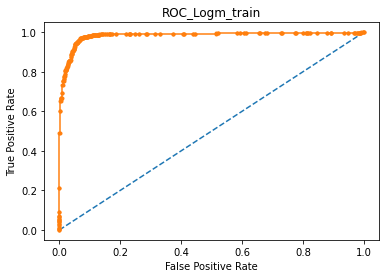

In [205]:
fpr,tpr,thresholds = roc_curve(y_train,prob_train_logm)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Logm_train')
plt.show()

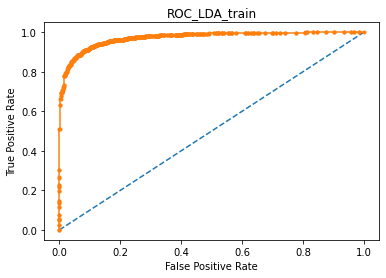

In [206]:
fpr,tpr,thresholds = roc_curve(y_train,prob_train_lda)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_LDA_train')
plt.show()

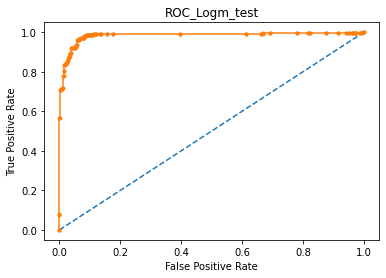

In [207]:
fpr,tpr,thresholds = roc_curve(y_test,prob_test_logm)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Logm_test')
plt.show()

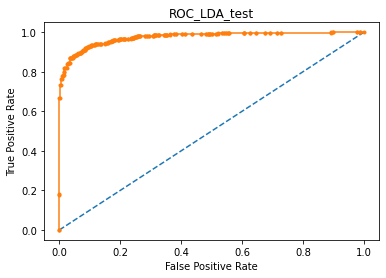

In [208]:
fpr,tpr,thresholds = roc_curve(y_test,prob_test_lda)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_LDA_test')
plt.show()

### Insights:
1. From the ROC curve, we see that for the train data set, the roc curve for logistic regression is better since the curve is closer to the upper left corner (0,1).
2. Also, for the test data set, the logistic model has a better roc curve.
3. From the confusion matrix, we see that for both the train and test set, the logistic regression model has higher number of true positives and false negatives than the LDA model.

#### Final Model Interpretation
We observe that the logisitc regression model has better performance metrics than LDA model with respect to accuracy, ROC_score, precision, recall, ROC curve as well as confusion matrix true positive and false negative values, hence we will use Logistic regression as our final predictive model.

### 2.4) Inference: Based on these predictions, what are the insights and recommendations. (6 marks)

Kindly find the inferences in the business report.

In [214]:
logm.coef_

array([[-3.74439118e-01,  4.13620405e-03, -1.74098195e+00,
        -1.89198270e+00,  6.81389394e-01,  1.16312991e-01,
        -3.53723992e-02,  1.41696358e+00,  9.86724942e-01,
        -4.43831307e+00,  2.18398564e-01]])

In [224]:
for i, col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,logm.coef_[0][i]))

The coeff for dvcat is -0.374439118208816
The coeff for weight is 0.004136204051461044
The coeff for airbag is -1.740981950259273
The coeff for seatbelt is -1.8919827001149991
The coeff for frontal is 0.6813893939940868
The coeff for sex is 0.11631299100348566
The coeff for ageOFocc is -0.03537239921916684
The coeff for occRole is 1.4169635759590806
The coeff for deploy is 0.9867249419595925
The coeff for injSeverity is -4.438313070775975
The coeff for VehAcc_years is 0.2183985639141064


In [232]:
car[car['Survived'] == 'Not_Survived']['occRole'].value_counts()

driver    891
pass      289
Name: occRole, dtype: int64

In [234]:
car[car['Survived'] == 'Not_Survived']['injSeverity'].value_counts()

4.0    1084
3.0      87
2.0       7
1.0       1
5.0       1
Name: injSeverity, dtype: int64